# Creating the model

### Installation

#### Clone and install the Tensorflow Object Detection API 

In [ ]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 72856, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 72856 (delta 14), reused 14 (delta 5), pack-reused 72825
Receiving objects: 100% (72856/72856), 579.23 MiB | 34.54 MiB/s, done.
Resolving deltas: 100% (51563/51563), done.


In [ ]:
%cd /content/models/research/
!protoc object_detection/protos/*.proto --python_out=.
# Install TensorFlow Object Detection API.
!cp object_detection/packages/tf2/setup.py .
!python -m pip install .

/content/models/research
Processing /content/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 10.2 MB 37.7 MB/s 
     |████████████████████████████████| 352 kB 61.1 MB/s 
     |████████████████████████████████| 2.2 MB 67.5 MB/s 
     |████████████████████████████████| 23.4 MB 1.5 MB/s 
     |████████████████████████████████| 90 kB 12.2 MB/s 
     |████████████████████████████████| 4.9 MB 64.7 MB/s 
     |████████████████████████████████| 1.1 MB 71.1 MB/s 
     |████████████████████████████████| 43 kB 2.6 MB/s 
     |████████████████████████████████| 237 kB 29.9 MB/s 
     |█████████████████

Run model builder test

In [ ]:
!python /content/models/research/object_detection/builders/model_builder_tf2_test.py

Running tests under Python 3.7.13: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-05-13 05:43:34.081359: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
W0513 05:43:34.548027 139814611208064 model_builder.py:1102] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 4.17s
I0513 05:43:35.231615 139814611208064 test_util.py:2374] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 4.17s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)): 1.02s
I0513 05:43:36.250092 139814611208064 test

### Getting the data

In [ ]:
%mkdir /content/dataset
%cd /content/dataset
!curl -L "https://app.roboflow.com/ds/TtQ4kQWUVv?key=8EPJb4yPQw" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

/content/dataset
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   891  100   891    0     0   2076      0 --:--:-- --:--:-- --:--:--  2076
100  565M  100  565M    0     0   128M      0  0:00:04  0:00:04 --:--:--  146M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/korean-food.tfrecord  
 extracting: test/korean-food_label_map.pbtxt  
   creating: train/
 extracting: train/korean-food.tfrecord  
 extracting: train/korean-food_label_map.pbtxt  
   creating: valid/
 extracting: valid/korean-food.tfrecord  
 extracting: valid/korean-food_label_map.pbtxt  


##### Create a `labelmap.pbtxt` file, following the pattern:



```
item {
  name: "kangaroo"
  id: 1
}
```



### Configuring train

We are going to use the pretrained TF2 MobileNet V2 model as the feature extractor in the SSD MobileNet V2 Object Detection model. So the next logical step is to download and untar the pretrained TF2 MobileNet V2 model.

#### Downloading MobileNet weights

In [ ]:
%cd /content
!wget http://download.tensorflow.org/models/object_detection/classification/tf2/20200710/mobilenet_v2.tar.gz
!tar -xvf mobilenet_v2.tar.gz
!rm mobilenet_v2.tar.gz

/content
--2022-05-13 05:44:09--  http://download.tensorflow.org/models/object_detection/classification/tf2/20200710/mobilenet_v2.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.253.62.128, 2607:f8b0:4004:c19::80
Connecting to download.tensorflow.org (download.tensorflow.org)|172.253.62.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8404070 (8.0M) [application/x-tar]
Saving to: ‘mobilenet_v2.tar.gz’

mobilenet_v2.tar.gz 100%[===================>]   8.01M  --.-KB/s    in 0.1s    

2022-05-13 05:44:10 (77.0 MB/s) - ‘mobilenet_v2.tar.gz’ saved [8404070/8404070]

mobilenet_v2/
mobilenet_v2/mobilenet_v2.ckpt-1.index
mobilenet_v2/checkpoint
mobilenet_v2/mobilenet_v2.ckpt-1.data-00001-of-00002
mobilenet_v2/mobilenet_v2.ckpt-1.data-00000-of-00002


In [ ]:
!wget https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/ssd_mobilenet_v2_320x320_coco17_tpu-8.config
!mv ssd_mobilenet_v2_320x320_coco17_tpu-8.config mobilenet_v2.config

--2022-05-13 05:44:10--  https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/ssd_mobilenet_v2_320x320_coco17_tpu-8.config
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4484 (4.4K) [text/plain]
Saving to: ‘ssd_mobilenet_v2_320x320_coco17_tpu-8.config’

ssd_mobilenet_v2_32 100%[===================>]   4.38K  --.-KB/s    in 0s      

2022-05-13 05:44:10 (75.3 MB/s) - ‘ssd_mobilenet_v2_320x320_coco17_tpu-8.config’ saved [4484/4484]



#### Defining training parameters

In [ ]:
num_classes = 60
batch_size = 16
num_steps = 100000
num_eval_steps = 1000

train_record_path = '/content/dataset/train/korean-food.tfrecord'
test_record_path = '/content/dataset/test/korean-food.tfrecord'
model_dir = '/content/drive/MyDrive/Bubbling_project/220513_new_training/'
labelmap_path = '/content/dataset/train/korean-food_label_map.pbtxt'

pipeline_config_path = 'mobilenet_v2.config'
fine_tune_checkpoint = '/content/mobilenet_v2/mobilenet_v2.ckpt-1'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Editing config file

In [ ]:
import re

%cd /content/
with open(pipeline_config_path) as f:
    config = f.read()

with open(pipeline_config_path, 'w') as f:

  # Set labelmap path
  config = re.sub('label_map_path: ".*?"', 
             'label_map_path: "{}"'.format(labelmap_path), config)
  
  # Set fine_tune_checkpoint path
  config = re.sub('fine_tune_checkpoint: ".*?"',
                  'fine_tune_checkpoint: "{}"'.format(fine_tune_checkpoint), config)
  
  # Set train tf-record file path
  config = re.sub('(input_path: ".*?)(PATH_TO_BE_CONFIGURED/train)(.*?")', 
                  'input_path: "{}"'.format(train_record_path), config)
  
  # Set test tf-record file path
  config = re.sub('(input_path: ".*?)(PATH_TO_BE_CONFIGURED/val)(.*?")', 
                  'input_path: "{}"'.format(test_record_path), config)
  
  # Set number of classes.
  config = re.sub('num_classes: [0-9]+',
                  'num_classes: {}'.format(num_classes), config)
  
  # Set batch size
  config = re.sub('batch_size: [0-9]+',
                  'batch_size: {}'.format(batch_size), config)
  
  # Set training steps
  config = re.sub('num_steps: [0-9]+',
                  'num_steps: {}'.format(num_steps), config)
  
  f.write(config)

/content


### Training the Network

In [ ]:
!pip uninstall opencv-python-headless==4.5.5.64
!pip install opencv-python-headless==4.5.2.52

Found existing installation: opencv-python-headless 4.5.5.64
Uninstalling opencv-python-headless-4.5.5.64:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.5.5.64.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-65fa80df.so.58.134.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-8ef5c7db.so.58.76.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavutil-9c768859.so.56.70.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libcrypto-09fe7800.so.1.1
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libgfortran-91cc3cb1.so.3.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libopenblas-r0-f650aae0.3.3.so
    /usr/local/lib/python3.7/dis

In [ ]:
!python /content/models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={pipeline_config_path} \
    --model_dir={model_dir} \
    --alsologtostderr \
    --num_train_steps={num_steps} \
    --sample_1_of_n_eval_examples=1 \
    --num_eval_steps={num_eval_steps}

2022-05-13 05:48:02.479562: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I0513 05:48:02.486866 139731947562880 mirrored_strategy.py:374] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: 100000
I0513 05:48:02.499333 139731947562880 config_util.py:552] Maybe overwriting train_steps: 100000
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0513 05:48:02.499521 139731947562880 config_util.py:552] Maybe overwriting use_bfloat16: False
Instructions for updating:
rename to distribute_datasets_from_function
W0513 05:48:02.724009 139731947562880 deprecation.py:343] From /usr/local/lib/python3.7/dist-packages/object_detection/model_lib_v2.py:564: StrategyBase.experi

In [ ]:
%load_ext tensorboard
%tensorboard --logdir '/content/drive/MyDrive/Bubbling_project/220513_new_training/'

### Export the Inference Graph

The below code cell adds a line to the tf_utils.py file. This is a temporary fix to a exporting issue occuring when using the OD API with Tensorflow 2. This code will be removed as soon as the OD Team puts out a fix.

All credit goes to the Github users [Jacobsolawetz](https://github.com/Jacobsolawetz) and [ Tanner Gilbert](https://github.com/TannerGilbert), who provided this [temporary fix](https://github.com/tensorflow/models/issues/8841#issuecomment-657647648).

In [ ]:
with open('/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/tf_utils.py') as f:
    tf_utils = f.read()

with open('/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/tf_utils.py', 'w') as f:
  # Set labelmap path
  throw_statement = "raise TypeError('Expected Operation, Variable, or Tensor, got ' + str(x))"
  tf_utils = tf_utils.replace(throw_statement, "if not isinstance(x, str):" + throw_statement)
  f.write(tf_utils)

In [ ]:
output_directory = 'inference_graph'

!python /content/models/research/object_detection/exporter_main_v2.py \
    --trained_checkpoint_dir {model_dir} \
    --output_directory {output_directory} \
    --pipeline_config_path {pipeline_config_path}

Traceback (most recent call last):
  File "/content/models/research/object_detection/exporter_main_v2.py", line 102, in <module>
    import tensorflow.compat.v2 as tf
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/__init__.py", line 37, in <module>
    from tensorflow.python.tools import module_util as _module_util
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/__init__.py", line 45, in <module>
    from tensorflow.python.feature_column import feature_column_lib as feature_column
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/feature_column/feature_column_lib.py", line 18, in <module>
    from tensorflow.python.feature_column.feature_column import *
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/feature_column/feature_column.py", line 143, in <module>
    from tensorflow.python.layers import base
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/layers/base.py", line 16, in <module>
    from tensorflow.pyth

##### Downloading weights

In [ ]:
!zip -r /content/saved_model.zip /content/inference_graph/saved_model/

  adding: content/inference_graph/saved_model/ (stored 0%)
  adding: content/inference_graph/saved_model/saved_model.pb (deflated 93%)
  adding: content/inference_graph/saved_model/variables/ (stored 0%)
  adding: content/inference_graph/saved_model/variables/variables.data-00000-of-00001 (deflated 6%)
  adding: content/inference_graph/saved_model/variables/variables.index (deflated 77%)
  adding: content/inference_graph/saved_model/assets/ (stored 0%)


In [ ]:
from google.colab import files
files.download("/content/saved_model.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###  Testing the trained model

Based on [Object Detection API Demo](https://github.com/tensorflow/models/blob/master/research/object_detection/colab_tutorials/object_detection_tutorial.ipynb) and [Inference from saved model tf2 colab](https://github.com/tensorflow/models/blob/master/research/object_detection/colab_tutorials/inference_from_saved_model_tf2_colab.ipynb).

In [ ]:
!wget https://raw.githubusercontent.com/hugozanini/object-detection/master/inferenceutils.py
from inferenceutils import *

--2022-05-05 04:59:27--  https://raw.githubusercontent.com/hugozanini/object-detection/master/inferenceutils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2219 (2.2K) [text/plain]
Saving to: ‘inferenceutils.py’

inferenceutils.py   100%[===================>]   2.17K  --.-KB/s    in 0s      

2022-05-05 04:59:27 (30.7 MB/s) - ‘inferenceutils.py’ saved [2219/2219]



##### Loading the model

In [ ]:
output_directory = 'inference_graph/'

In [ ]:
category_index = label_map_util.create_category_index_from_labelmap(labelmap_path, use_display_name=True)
tf.keras.backend.clear_session()
model = tf.saved_model.load(f'/content/{output_directory}/saved_model')

##### Selecting the images to test

In [ ]:
%mkdir /content/csv_dataset
%cd /content/csv_dataset
!curl -L "https://app.roboflow.com/ds/wVqerq26Oc?key=7rSF6O4vnq" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 extracting: train/--_mp4-97_jpg.rf.05d960959d43d201a1f1a5b3755a4c2c.jpg  
 extracting: train/--_mp4-97_jpg.rf.98c0e6a0ad81639b3ea342d39bd9fd82.jpg  
 extracting: train/--_mp4-98_jpg.rf.9a07032d22f93a359eddd26acfd2ac03.jpg  
 extracting: train/--_mp4-98_jpg.rf.e3b6b76b52d14a4e6fe4fae72d97560f.jpg  
 extracting: train/--_mp4-98_jpg.rf.f919c9f7961cb4700c41919f7f525624.jpg  
 extracting: train/--_mp4-99_jpg.rf.207d82c138bea132ff38350d7a707680.jpg  
 extracting: train/--_mp4-99_jpg.rf.276e1d41d3670c7cef5798345d936435.jpg  
 extracting: train/--_mp4-99_jpg.rf.9b1a244b6ea6199465044f0721bcd5b5.jpg  
 extracting: train/--_mp4-99_jpg.rf.e45485887ac95cc5dfe5baab1f7604b6.jpg  
 extracting: train/--_mp4-9_jpg.rf.14d273a9d68313c68c7c787ae844bc8a.jpg  
 extracting: train/--_mp4-9_jpg.rf.22444d51c2ad74760d41a2046a85debe.jpg  
 extracting: train/--_mp4-9_jpg.rf.5100cda35b083a208cb26f74722a225a.jpg  
 extracting: train/--_mp4-9_jpg.rf.9e544e5c082479f59000190b0bda2d3d

##### Doing inference

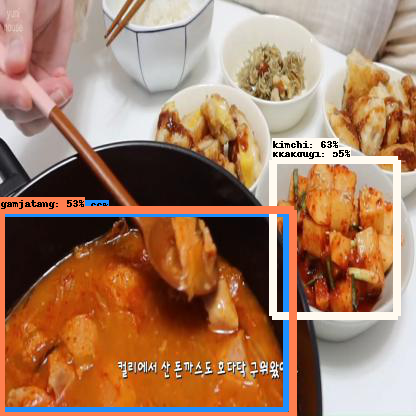

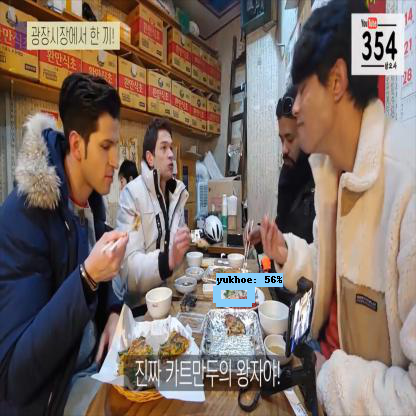

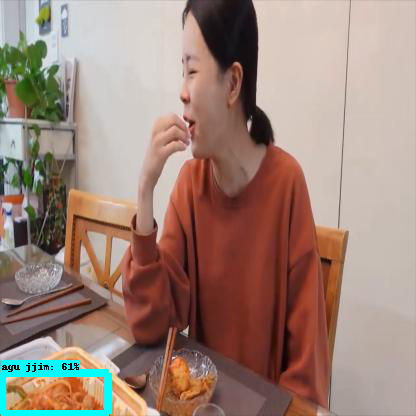

In [ ]:
images = ['/content/csv_dataset/test/-----------_mp4-128_jpg.rf.4d20f2a074574f9db1d3f2ff35f4fdd3.jpg',
          '/content/csv_dataset/test/------_mp4-99_jpg.rf.1e12684356800d5935dc948f69ce269f.jpg',
          '/content/csv_dataset/test/---1_mp4-173_jpg.rf.7ba91e1843d79238998580ba69e05f83.jpg']

for image_name in images:
  
  image_np = load_image_into_numpy_array(image_name)
  output_dict = run_inference_for_single_image(model, image_np)
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks_reframed', None),
      use_normalized_coordinates=True,
      line_thickness=8)
  display(Image.fromarray(image_np))

### References

Blog post: https://gilberttanner.com/blog/tensorflow-object-detection-with-tensorflow-2-creating-a-custom-model

Notebook: https://github.com/TannerGilbert/Tensorflow-Object-Detection-API-Train-Model/blob/master/Tensorflow_2_Object_Detection_Train_model.ipynb

Blog post: https://medium.com/swlh/image-object-detection-tensorflow-2-object-detection-api-af7244d4c34e

Notebook: https://github.com/TannerGilbert/Tensorflow-Object-Detection-API-Train-Model/blob/master/Tensorflow_2_Object_Detection_Train_model.ipynb

Model Zoo: https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md

Models configs: https://github.com/tensorflow/models/tree/master/research/object_detection/configs/tf2

https://gist.github.com/woudsma/d01eeda8998c9ab972d05ec9e9843886

https://github.com/tensorflow/tfjs/tree/master/tfjs-converter